## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.700148  1.466255 -1.013372 -1.600870  1.038021  0.211975
1 -0.582885  1.474095  0.582752 -0.738111  0.080147 -0.138562
2 -1.460845  1.680006 -0.879614 -0.338333  0.038472 -1.124206
3 -0.352979 -0.690793 -1.649404  1.250095  0.533389  1.039022
4 -0.664970 -0.804514 -0.737345  0.389951 -0.702088 -0.662118


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9521733	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9426977	total: 58.1ms	remaining: 29s
2:	learn: 0.9323326	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9219631	total: 59.1ms	remaining: 14.7s
4:	learn: 0.9121924	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9025496	total: 60ms	remaining: 9.94s
6:	learn: 0.8928279	total: 60.6ms	remaining: 8.6s
7:	learn: 0.8843632	total: 61.4ms	remaining: 7.61s
8:	learn: 0.8759077	total: 61.9ms	remaining: 6.81s
9:	learn: 0.8689729	total: 62.5ms	remaining: 6.19s
10:	learn: 0.8603198	total: 63.1ms	remaining: 5.67s
11:	learn: 0.8504762	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8408670	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8327507	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8269505	total: 65ms	remaining: 4.27s
15:	learn: 0.8193891	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8110882	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8025001	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7944317	total: 66.7ms	remaining: 3.44s


112:	learn: 0.3532729	total: 109ms	remaining: 853ms
113:	learn: 0.3506199	total: 109ms	remaining: 849ms
114:	learn: 0.3479535	total: 110ms	remaining: 844ms
115:	learn: 0.3446746	total: 110ms	remaining: 839ms
116:	learn: 0.3416870	total: 110ms	remaining: 834ms
117:	learn: 0.3390762	total: 111ms	remaining: 829ms
118:	learn: 0.3365606	total: 111ms	remaining: 825ms
119:	learn: 0.3339109	total: 112ms	remaining: 821ms
120:	learn: 0.3316292	total: 112ms	remaining: 816ms
121:	learn: 0.3290531	total: 113ms	remaining: 811ms
122:	learn: 0.3271222	total: 113ms	remaining: 806ms
123:	learn: 0.3250734	total: 113ms	remaining: 802ms
124:	learn: 0.3224651	total: 114ms	remaining: 797ms
125:	learn: 0.3195869	total: 114ms	remaining: 793ms
126:	learn: 0.3174984	total: 115ms	remaining: 788ms
127:	learn: 0.3148837	total: 115ms	remaining: 784ms
128:	learn: 0.3123641	total: 116ms	remaining: 780ms
129:	learn: 0.3104281	total: 116ms	remaining: 777ms
130:	learn: 0.3082119	total: 117ms	remaining: 773ms
131:	learn: 

277:	learn: 0.1122325	total: 187ms	remaining: 485ms
278:	learn: 0.1114701	total: 187ms	remaining: 484ms
279:	learn: 0.1106187	total: 188ms	remaining: 482ms
280:	learn: 0.1098836	total: 188ms	remaining: 481ms
281:	learn: 0.1091144	total: 189ms	remaining: 480ms
282:	learn: 0.1083573	total: 189ms	remaining: 479ms
283:	learn: 0.1077174	total: 190ms	remaining: 478ms
284:	learn: 0.1071265	total: 190ms	remaining: 476ms
285:	learn: 0.1064234	total: 190ms	remaining: 475ms
286:	learn: 0.1058675	total: 191ms	remaining: 474ms
287:	learn: 0.1049340	total: 191ms	remaining: 472ms
288:	learn: 0.1044525	total: 191ms	remaining: 471ms
289:	learn: 0.1039251	total: 192ms	remaining: 470ms
290:	learn: 0.1034039	total: 192ms	remaining: 469ms
291:	learn: 0.1026411	total: 193ms	remaining: 467ms
292:	learn: 0.1020931	total: 193ms	remaining: 466ms
293:	learn: 0.1014132	total: 194ms	remaining: 466ms
294:	learn: 0.1008865	total: 194ms	remaining: 465ms
295:	learn: 0.1003724	total: 195ms	remaining: 464ms
296:	learn: 

493:	learn: 0.0357614	total: 292ms	remaining: 299ms
494:	learn: 0.0356905	total: 293ms	remaining: 299ms
495:	learn: 0.0356430	total: 293ms	remaining: 298ms
496:	learn: 0.0353959	total: 294ms	remaining: 297ms
497:	learn: 0.0353036	total: 294ms	remaining: 296ms
498:	learn: 0.0352572	total: 294ms	remaining: 296ms
499:	learn: 0.0351074	total: 295ms	remaining: 295ms
500:	learn: 0.0349652	total: 295ms	remaining: 294ms
501:	learn: 0.0347235	total: 296ms	remaining: 293ms
502:	learn: 0.0346418	total: 296ms	remaining: 292ms
503:	learn: 0.0344963	total: 296ms	remaining: 292ms
504:	learn: 0.0343541	total: 297ms	remaining: 291ms
505:	learn: 0.0341173	total: 298ms	remaining: 290ms
506:	learn: 0.0339435	total: 298ms	remaining: 290ms
507:	learn: 0.0338997	total: 298ms	remaining: 289ms
508:	learn: 0.0338567	total: 299ms	remaining: 288ms
509:	learn: 0.0337782	total: 299ms	remaining: 287ms
510:	learn: 0.0337049	total: 299ms	remaining: 286ms
511:	learn: 0.0336435	total: 300ms	remaining: 286ms
512:	learn: 

658:	learn: 0.0172370	total: 370ms	remaining: 191ms
659:	learn: 0.0171637	total: 371ms	remaining: 191ms
660:	learn: 0.0171083	total: 371ms	remaining: 190ms
661:	learn: 0.0170297	total: 371ms	remaining: 190ms
662:	learn: 0.0169664	total: 372ms	remaining: 189ms
663:	learn: 0.0169093	total: 373ms	remaining: 188ms
664:	learn: 0.0168547	total: 373ms	remaining: 188ms
665:	learn: 0.0167782	total: 374ms	remaining: 187ms
666:	learn: 0.0167247	total: 374ms	remaining: 187ms
667:	learn: 0.0166498	total: 374ms	remaining: 186ms
668:	learn: 0.0165935	total: 375ms	remaining: 185ms
669:	learn: 0.0165419	total: 375ms	remaining: 185ms
670:	learn: 0.0164600	total: 376ms	remaining: 184ms
671:	learn: 0.0164098	total: 376ms	remaining: 183ms
672:	learn: 0.0163647	total: 376ms	remaining: 183ms
673:	learn: 0.0162920	total: 377ms	remaining: 182ms
674:	learn: 0.0162398	total: 377ms	remaining: 182ms
675:	learn: 0.0161966	total: 378ms	remaining: 181ms
676:	learn: 0.0161305	total: 378ms	remaining: 180ms
677:	learn: 

881:	learn: 0.0082831	total: 475ms	remaining: 63.6ms
882:	learn: 0.0082617	total: 476ms	remaining: 63.1ms
883:	learn: 0.0082556	total: 476ms	remaining: 62.5ms
884:	learn: 0.0082215	total: 477ms	remaining: 62ms
885:	learn: 0.0082005	total: 477ms	remaining: 61.4ms
886:	learn: 0.0081669	total: 478ms	remaining: 60.9ms
887:	learn: 0.0081610	total: 478ms	remaining: 60.3ms
888:	learn: 0.0081239	total: 479ms	remaining: 59.8ms
889:	learn: 0.0081180	total: 479ms	remaining: 59.2ms
890:	learn: 0.0080974	total: 480ms	remaining: 58.7ms
891:	learn: 0.0080916	total: 480ms	remaining: 58.1ms
892:	learn: 0.0080660	total: 480ms	remaining: 57.6ms
893:	learn: 0.0080459	total: 481ms	remaining: 57ms
894:	learn: 0.0080370	total: 481ms	remaining: 56.5ms
895:	learn: 0.0080192	total: 482ms	remaining: 55.9ms
896:	learn: 0.0079832	total: 482ms	remaining: 55.4ms
897:	learn: 0.0079744	total: 482ms	remaining: 54.8ms
898:	learn: 0.0079658	total: 483ms	remaining: 54.2ms
899:	learn: 0.0079465	total: 483ms	remaining: 53.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

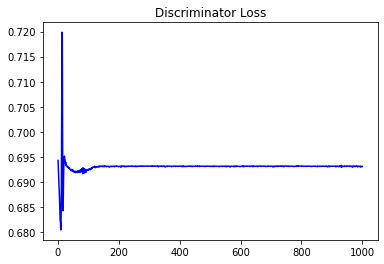

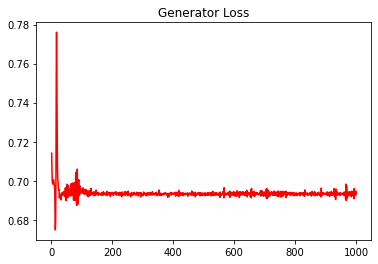

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16507653473621367


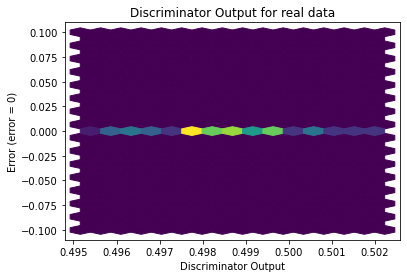

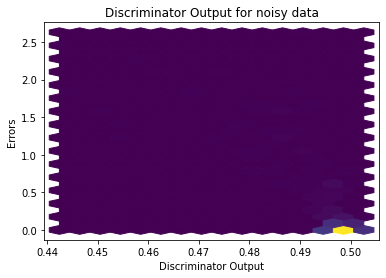

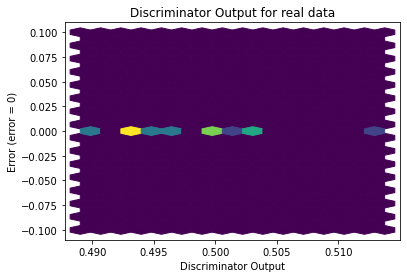

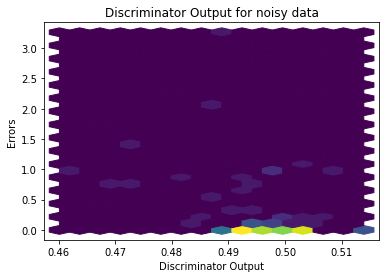

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


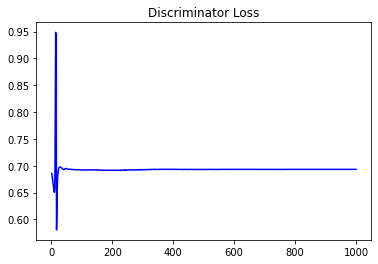

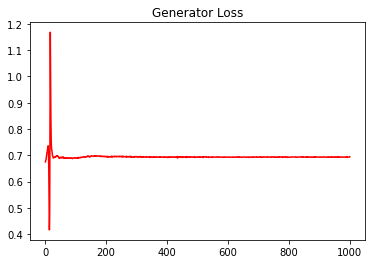

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14455572580950032


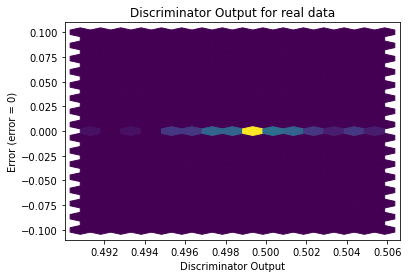

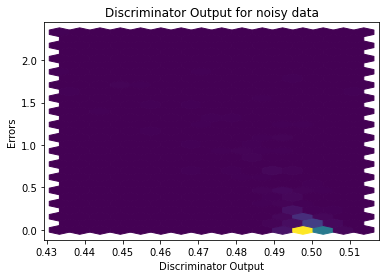

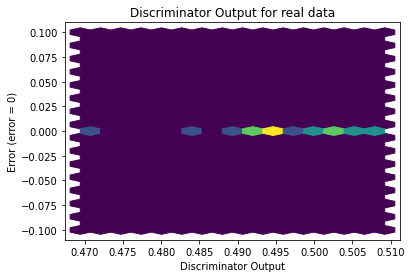

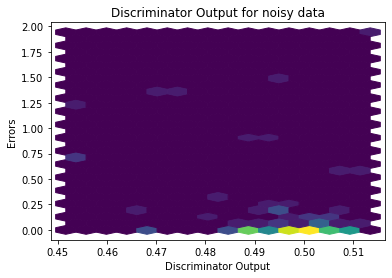

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0700]], requires_grad=True)
